#HW 5: Regularization 

In [ ]:
from pandas.core.common import random_state
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

#getting rid of exponential form for interpretability
pd.set_option('display.float_format', lambda x: '%.9f' % x)

#Here we will set randomization consistency, and a sick theme 
sns.set()
rand_state=1000
#sns.set_palette("viridis")
import warnings
warnings.filterwarnings('ignore')

##Importing Data

In [ ]:
# pulling in the data here
!wget -nc  https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/fall22/data/HW_data/HW5/wage_regularization.csv

df=pd.read_csv('wage_regularization.csv')

File ‘wage_regularization.csv’ already there; not retrieving.



In [ ]:
df.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,769000.000000000,12,144,1728,20736,248832,31,961,29791,923521,28629151
1,808000.000000000,18,324,5832,104976,1889568,37,1369,50653,1874161,69343957
2,825000.000000000,14,196,2744,38416,537824,33,1089,35937,1185921,39135393
3,650000.000000000,12,144,1728,20736,248832,32,1024,32768,1048576,33554432
4,562000.000000000,11,121,1331,14641,161051,34,1156,39304,1336336,45435424


In [ ]:
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)
df_sc

array([[-0.46751952, -0.66885143, -0.681389  , ..., -0.70895446,
        -0.72303072, -0.73357606],
       [-0.37101938,  2.06403752,  2.2236843 , ...,  1.29793053,
         1.31081019,  1.32021092],
       [-0.32895523,  0.24211155,  0.1578544 , ..., -0.11772087,
        -0.16164066, -0.20360711],
       ...,
       [-1.03909722, -0.66885143, -0.681389  , ..., -1.46305145,
        -1.38383005, -1.30957655],
       [-0.21018583, -0.66885143, -0.681389  , ..., -1.46305145,
        -1.38383005, -1.30957655],
       [ 0.10405818, -0.66885143, -0.681389  , ...,  0.54970162,
         0.51165088,  0.4716505 ]])

In [94]:
df_sc.describe()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
count,935.000000000,935.000000000,935.000000000,935.000000000,935.000000000,935.000000000,935.000000000,935.000000000,935.000000000,935.000000000,935.000000000
mean,-0.000000000,-0.000000000,-0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,-0.000000000,-0.000000000,0.000000000,0.000000000
std,1.000535189,1.000535189,1.000535189,1.000535189,1.000535189,1.000535189,1.000535189,1.000535189,1.000535189,1.000535189,1.000535189
min,-2.085752483,-2.035295910,-1.698164650,-1.429086730,-1.216921334,-1.050634559,-1.635538791,-1.547054434,-1.463051451,-1.383830053,-1.309576548
25%,-0.714955749,-0.668851432,-0.681388997,-0.683464913,-0.677116289,-0.664267790,-0.991652993,-0.986157218,-0.977443387,-0.965902531,-0.951952495
50%,-0.131006239,-0.668851432,-0.681388997,-0.683464913,-0.677116289,-0.664267790,-0.025824297,-0.072281582,-0.117720869,-0.161640656,-0.203607111
75%,0.499956157,1.153074538,1.126212163,1.083934949,1.028934223,0.963878593,0.940004400,0.928629829,0.913426682,0.894592080,0.872386830
max,5.245783114,2.064037523,2.223684296,2.379630119,2.530867978,2.675999075,1.583890197,1.644257311,1.703790362,1.762179355,1.819155717


In [95]:
df_sc.columns

Index(['wage', 'educ', 'educ2', 'educ3', 'educ4', 'educ5', 'age', 'age2',
       'age3', 'age4', 'age5'],
      dtype='object')

In [96]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,-0.467519516,-0.668851432,-0.681388997,-0.683464913,-0.677116289,-0.664267790,-0.669710094,-0.691202648,-0.708954459,-0.723030725,-0.733576064
1,-0.371019385,2.064037523,2.223684296,2.379630119,2.530867978,2.675999075,1.261947299,1.281608249,1.297930532,1.310810186,1.320210924
2,-0.328955225,0.242111553,0.157854398,0.074845163,-0.003835640,-0.075927922,-0.025824297,-0.072281582,-0.117720869,-0.161640656,-0.203607111
3,-0.761968634,-0.668851432,-0.681388997,-0.683464913,-0.677116289,-0.664267790,-0.347767196,-0.386577436,-0.422572683,-0.455482573,-0.485128902
4,-0.979712519,-1.124332925,-1.052592807,-0.979773083,-0.909222938,-0.842975373,0.296118602,0.251684913,0.206178170,0.160163792,0.114186904


## Splitting Data

In [97]:
y = df_sc['wage']
X = df_sc.drop('wage', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
932,-0.668851432,-0.681388997,-0.683464913,-0.677116289,-0.664267790,-1.635538791,-1.547054434,-1.463051451,-1.383830053,-1.309576548
82,-1.124332925,-1.052592807,-0.979773083,-0.909222938,-0.842975373,1.261947299,1.281608249,1.297930532,1.310810186,1.320210924
370,1.608556030,1.658808933,1.693717756,1.713829725,1.719745242,1.583890197,1.644257311,1.703790362,1.762179355,1.819155717
452,-0.668851432,-0.681388997,-0.683464913,-0.677116289,-0.664267790,0.940004400,0.928629829,0.913426682,0.894592080,0.872386830
132,-0.668851432,-0.681388997,-0.683464913,-0.677116289,-0.664267790,-0.669710094,-0.691202648,-0.708954459,-0.723030725,-0.733576064


###OLS benchmark

In [98]:
# run OLS model using statsmodel.api as a baseliine
X_train_wc = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_wc)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     10.81
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           2.83e-17
Time:                        01:24:47   Log-Likelihood:                -1016.0
No. Observations:                 748   AIC:                             2054.
Df Residuals:                     737   BIC:                             2105.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.035     -0.080      0.9

our OLS model gives a baseline R^2 of 12.8%. None of our features appear to be significant at any acceptable level. 

##Regularization

In [ ]:
#default parameters (alpha=1)
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_net = ElasticNet() 

In [ ]:
#obtain predictions across models
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [ ]:
#create new dataframe with each model predictions 
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
434,0.042199125,-0.267170051,-0.202696083,-0.012852129,-0.012852129
238,1.910342687,0.699718112,0.704007378,-0.012852129,-0.012852129
531,-0.700109575,-0.065042139,0.045578674,-0.012852129,-0.012852129
157,2.328509922,0.689507991,0.653409971,-0.012852129,-0.012852129
601,1.341239351,0.208652254,0.171149260,-0.012852129,-0.012852129


###coefficients dataframe

In [ ]:
df.drop('wage', axis=1, inplace=False).columns

Index(['educ', 'educ2', 'educ3', 'educ4', 'educ5', 'age', 'age2', 'age3',
       'age4', 'age5'],
      dtype='object')

In [99]:
coefficients = pd.DataFrame({'Features':df.drop('wage', axis=1, inplace=False).columns})
coefficients['model_linear']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_linear,model_ridge,model_lasso,model_net
0,educ,-109.991744851,0.169171676,0.000000000,0.000000000
1,educ2,462.562173563,0.309854489,0.000000000,0.000000000
2,educ3,-736.380870132,0.232209320,0.000000000,0.000000000
3,educ4,527.476085430,-0.016856627,0.000000000,0.000000000
4,educ5,-143.414487192,-0.393124322,0.000000000,0.000000000
5,age,-1295.337038336,0.005242399,0.000000000,0.000000000
6,age2,5164.461987880,0.136965548,0.000000000,0.000000000
7,age3,-7783.011658128,0.147814000,0.000000000,0.000000000
8,age4,5255.053774676,0.043936021,0.000000000,0.000000000
9,age5,-1341.061042348,-0.166490033,0.000000000,0.000000000


Our lasso and elastic net coefficients are 0 because the penalty assessed in those models is larger than ridge and over-penalizes them at the default alpha. 

##Cross-Validation

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

###Ridge

In [ ]:
#define set of alphas from 1-10000.....
alpha_ridge = 10**np.linspace(0,5,100)
#run CV for ridge
ridgecv = RidgeCV(alphas=alpha_ridge)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

12.91549665014884

optimal alpha for ridge is 12.9

In [ ]:
alpha_ridge_opt = ridgecv.alpha_

###Lasso 

In [ ]:
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.010732138475800224

optimal alpha for Lasso is 0.0107

In [ ]:
alpha_lasso_opt = lassocv.alpha_

###ElasticNet

In [ ]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.010682821217946607

In [ ]:
alpha_elasticnet_opt = elasticnetcv.alpha_

In [ ]:
#ridge to lasso ratio
elasticnetcv.l1_ratio_

0.5

##Test

In [ ]:
#Re-train with optimized alpha
model_ridge_opt = Ridge(alpha = alpha_ridge_opt)
model_lasso_opt = Lasso(alpha = alpha_lasso_opt)
model_net_opt = ElasticNet(alpha = alpha_elasticnet_opt) 

In [ ]:
#obtain predictions across models
y_hat_linear_opt= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge_opt = model_ridge_opt.fit(X_train, y_train).predict(X_test)
y_hat_lasso_opt = model_lasso_opt.fit(X_train, y_train).predict(X_test)
y_hat_net_opt   = model_net_opt.fit(X_train, y_train).predict(X_test)

In [ ]:
df_predictions_optimal = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear_opt':y_hat_linear_opt,
                               'y_hat_ridge_opt':y_hat_ridge_opt,
                               'y_hat_lasso_opt':y_hat_lasso_opt,
                               'y_hat_net_opt':y_hat_net_opt})

In [ ]:
RMSE_test_linear = np.sqrt(np.mean(np.square(df_predictions_optimal['y_test']-df_predictions_optimal['y_hat_linear_opt'])))
RMSE_test_Ridge = np.sqrt(np.mean(np.square(df_predictions_optimal['y_test']-df_predictions_optimal['y_hat_ridge_opt'])))
RMSE_test_LASSO = np.sqrt(np.mean(np.square(df_predictions_optimal['y_test']-df_predictions_optimal['y_hat_lasso_opt'])))
RMSE_test_net = np.sqrt(np.mean(np.square(df_predictions_optimal['y_test']-df_predictions_optimal['y_hat_net_opt'])))
RMSE_test_df = [RMSE_test_linear,RMSE_test_Ridge,RMSE_test_LASSO,RMSE_test_net]
RMSE_test_df

[0.8650244001011039,
 0.8671047935707901,
 0.8681611530299667,
 0.8676093910065268]

##Coefficients vs. Alpha 

###Ridge

In [ ]:
#ridge
alpha_ridge = 10**np.linspace(-1,1)

ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i).fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
np.shape(coefs_ridge)

(50, 10)

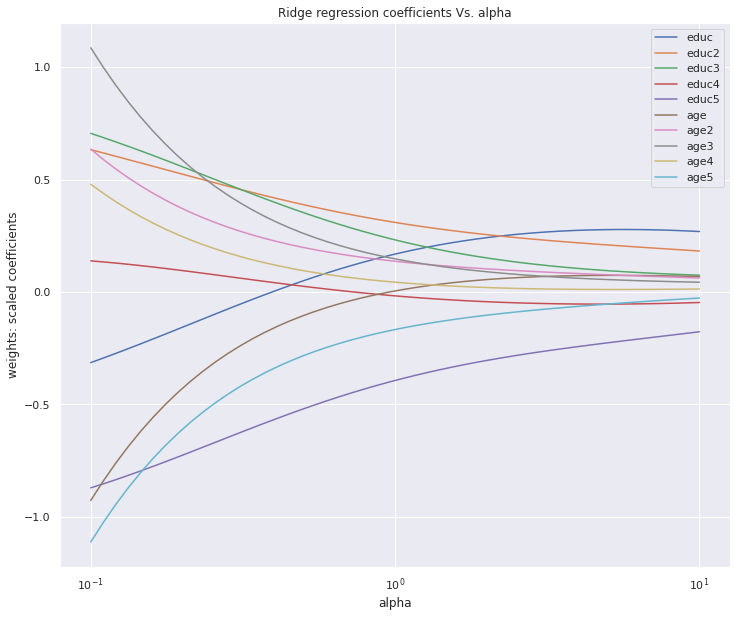

In [ ]:
#ridge

plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

In our plot we can see that *age4* and *age3* are decreasing to 0 faster than any other coefficent 

###Lasso

In [ ]:
#Lasso 
alpha_lasso = 10**np.linspace(-4,2,100)

lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i).fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 10)

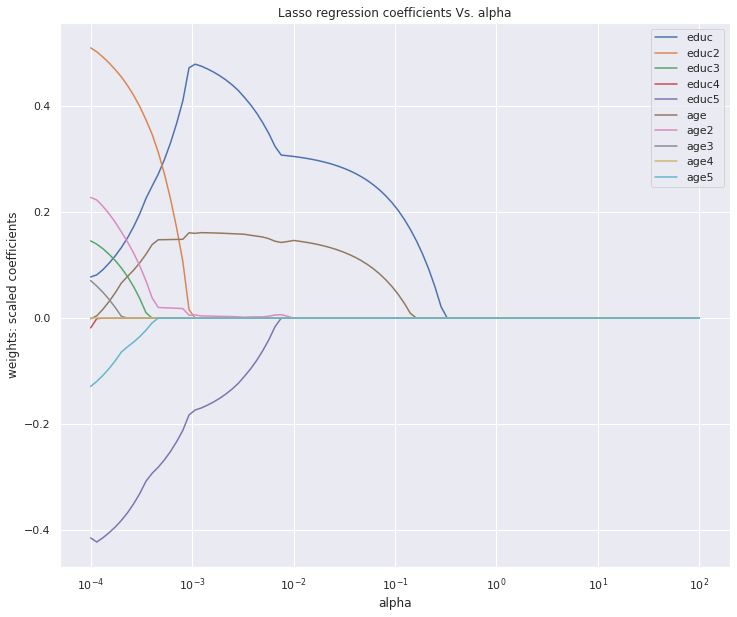

In [ ]:
#lasso
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

The only two variables that survive at alpha= 0.1 are *age* and *educ*. 

###Elastic net 

In [ ]:
#Elastic Net
alpha_elasticnet = 10**np.linspace(-4,2,100)

elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i).fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 10)

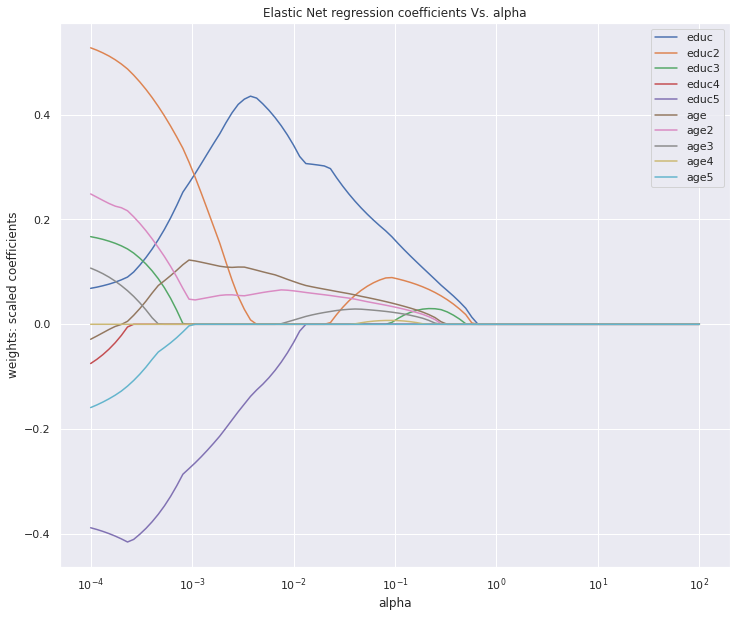

In [ ]:
#Plotting Elastic Net 
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('wage',axis=1, inplace=False).columns)

plt.show()

The coefficiens on LASSO are larger than elastic net because we have the influence of our ridge model, which sends some coefficients towards 0 as opposed to dropping it completely. The penalty assessed to the coefficients in the ridge model are bigger than those in the LASSSO model for coefficientss with a magnitude less than 1. Because the ridge penalty is not incorporated in the LASSO model, but it is in elastic net, we would expect the coefficients of the LASSO model at this alpha level to be bigger.

In [ ]:
%%shell
jupyter nbconvert --to html /content/HW4_LinearRegression.ipynb